In [1]:
import numpy as np
import matplotlib.pyplot as plt
from vehiclecontrol import ControllerBase, SingleTrackModel
from splinepath import SplinePath
from seaborn import despine

In [2]:
# %matplotlib  # Run if you want plots in external windows

Using matplotlib backend: Qt5Agg


In [ ]:
# Run the ipython magic below to activate automated import of modules. Useful if you write code in external .py files.
# %load_ext autoreload
# %autoreload 2

# Generate a path

In [3]:
class MiniController(ControllerBase):
    def __init__(self):
        super().__init__()
    
    def u(self, t, w):
        a = 0.0
        if t < 10:
            u = [np.pi / 180 * 10, a]
        elif t >= 10 and t < 20:
            u = [-np.pi / 180 * 11, a]
        elif t >= 20 and t < 23:
            u = [-np.pi / 180 * 0, a]
        elif t >= 23 and t < 40:
            u = [-np.pi / 180 * 15, a]
        else:
            u = [-np.pi / 180 * 0, a]
        return u

opts = {'L': 2, 
        'amax': np.inf,
        'amin': -np.inf,
        'deltamax': np.pi / 3,
        'deltamin': -np.pi / 3}

car = SingleTrackModel().set_attributes(opts)
car.Ts = 0.1
car.controller = MiniController()
w0 = np.array([0, 0, 0, 2])
z0 = car.simulate(w0, T=40, dt=0.1, t0=0.0)
t, w, u = z0
M = 10
p = w[::M, 0:2]

In [4]:
plt.figure(10, clear=True)
plt.plot(p[:, 0], p[:, 1], 'rx')

# Plot path and properties

In [5]:
pl = SplinePath(p)
print(f'Path length: {pl.length:.2f} m')

Path length: 79.84 m


With the SplinePath object, you can treat the path as a continuous function

In [6]:
s = np.linspace(0, pl.length, 100)
plt.figure(20, clear=True)
_ = plt.plot(pl.x(s), pl.y(s), 'b')
despine()

Plot curvature

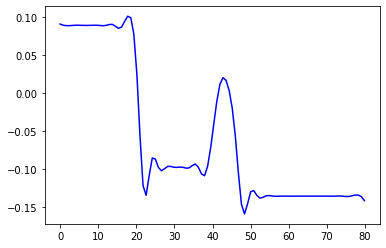

In [6]:
plt.figure(21, clear=True)
_ = plt.plot(s, pl.c(s), 'b')
despine()

In [7]:
s0 = 10
tangent, normal = pl.heading(s0)
print(f'Tangent: {tangent}')
print(f'Normal: {normal}')

Tangent: [0.64178049 0.76688839]
Normal: [-0.76688839  0.64178049]


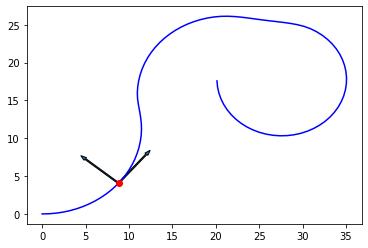

In [8]:
L = 5  # Arrow length
plt.figure(21, clear=True)
_ = plt.plot(pl.x(s), pl.y(s), 'b')
plt.plot(pl.x(s0), pl.y(s0), 'ro')
_ = plt.arrow(pl.x(s0), pl.y(s0), L*tangent[0], L*tangent[1], width=0.15)
_ = plt.arrow(pl.x(s0), pl.y(s0), L*normal[0], L*normal[1], width=0.15)
despine()

# Projection

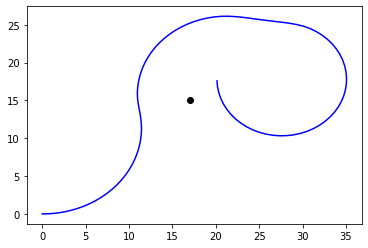

In [9]:
p0 = [17, 15]
plt.figure(22, clear=True)
_ = plt.plot(pl.x(s), pl.y(s), 'b')
plt.plot(p0[0], p0[1], 'ko')
despine()

In [10]:
pl.project(p0, 50)

(54.747875904907374, array(-18.42344358))

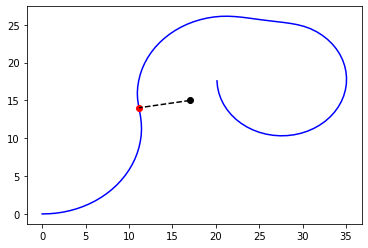

In [12]:
p0 = [17, 15]
# s_proj, _ = pl.project(p0, 70)
s_proj, _ = pl.project(p0, 20)

plt.figure(22, clear=True)
_ = plt.plot(pl.x(s), pl.y(s), 'b')
plt.plot(p0[0], p0[1], 'ko')
plt.plot(pl.x(s_proj), pl.y(s_proj), 'ro')
plt.plot([p0[0], pl.x(s_proj)], [p0[1], pl.y(s_proj)], 'k--')
despine()